In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
# Load the dataset
data = pd.read_csv('online_classroom_data.csv')

In [3]:
data.head()

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,"2,1","2,4","3,5","3,6","1,7",0
1,1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,"0,3","0,3",0,"0,1","0,2",0
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8,5,5,7,5,1
3,3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6,5,4,6,4,1
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,"8,7",9,"6,5",10,"8,8",1


In [4]:
#dropping 'Unnamed: 0' as it is indicating axis column
data = data.drop('Unnamed: 0',axis = 1)

In [5]:
data.shape

(71, 15)


Critical Thinking and Problem Solving Skills - named as SK1;
Criativity and Inovation Skills - named as SK2;
Constant and Self Learning Skills - named as SK3;
Collaboration and Self-Direction Skills - named as SK4;
Social and Cultural Responsability - named as SK5.
       

Each student was allowed to classify up to 10 reactions/day, one reaction type per post, in posts created by    other colleagues. There was available the following reactions (as wink-like image format): 


-Confusing post

-Amazing post

-Bad post

-Creative post

-Collaborative post 

-Nice Code post

-Helpful post

Final Student Result

The last column of the dataset brings if the student was approved or not at the class. The final result was a simple average between the 5 skills.


In [6]:
data['sk1_classroom']

0     2,1
1     0,3
2       8
3       6
4     8,7
     ... 
66     10
67    6,7
68      0
69    2,2
70      8
Name: sk1_classroom, Length: 71, dtype: object

In [7]:
#Looking at the type of cols
data.dtypes

total_posts           float64
helpful_post          float64
nice_code_post        float64
collaborative_post    float64
confused_post         float64
creative_post         float64
bad_post              float64
amazing_post          float64
timeonline            float64
sk1_classroom          object
sk2_classroom          object
sk5_classroom          object
sk3_classroom          object
sk4_classroom          object
Approved                int64
dtype: object

In [8]:
#converting types of some columns
def convert_to_float(value):
    if ',' in value:
        return float(value.replace(",", "."))
    else:
        return float(value)
    
data['sk1_classroom'] = data['sk1_classroom'].apply(lambda x: convert_to_float(x))
data['sk2_classroom'] = data['sk2_classroom'].apply(lambda x: convert_to_float(x))
data['sk3_classroom'] = data['sk3_classroom'].apply(lambda x: convert_to_float(x))
data['sk4_classroom'] = data['sk4_classroom'].apply(lambda x: convert_to_float(x))
data['sk5_classroom'] = data['sk5_classroom'].apply(lambda x: convert_to_float(x))

In [9]:
data.dtypes

total_posts           float64
helpful_post          float64
nice_code_post        float64
collaborative_post    float64
confused_post         float64
creative_post         float64
bad_post              float64
amazing_post          float64
timeonline            float64
sk1_classroom         float64
sk2_classroom         float64
sk5_classroom         float64
sk3_classroom         float64
sk4_classroom         float64
Approved                int64
dtype: object

In [10]:
#looking for missing values
data.isnull().sum()

total_posts           0
helpful_post          0
nice_code_post        0
collaborative_post    0
confused_post         0
creative_post         0
bad_post              0
amazing_post          0
timeonline            0
sk1_classroom         0
sk2_classroom         0
sk5_classroom         0
sk3_classroom         0
sk4_classroom         0
Approved              0
dtype: int64

In [11]:
{x:data[x].duplicated().sum() for x in data}

{'total_posts': 53,
 'helpful_post': 56,
 'nice_code_post': 50,
 'collaborative_post': 42,
 'confused_post': 65,
 'creative_post': 38,
 'bad_post': 68,
 'amazing_post': 37,
 'timeonline': 8,
 'sk1_classroom': 36,
 'sk2_classroom': 37,
 'sk5_classroom': 55,
 'sk3_classroom': 42,
 'sk4_classroom': 50,
 'Approved': 69}

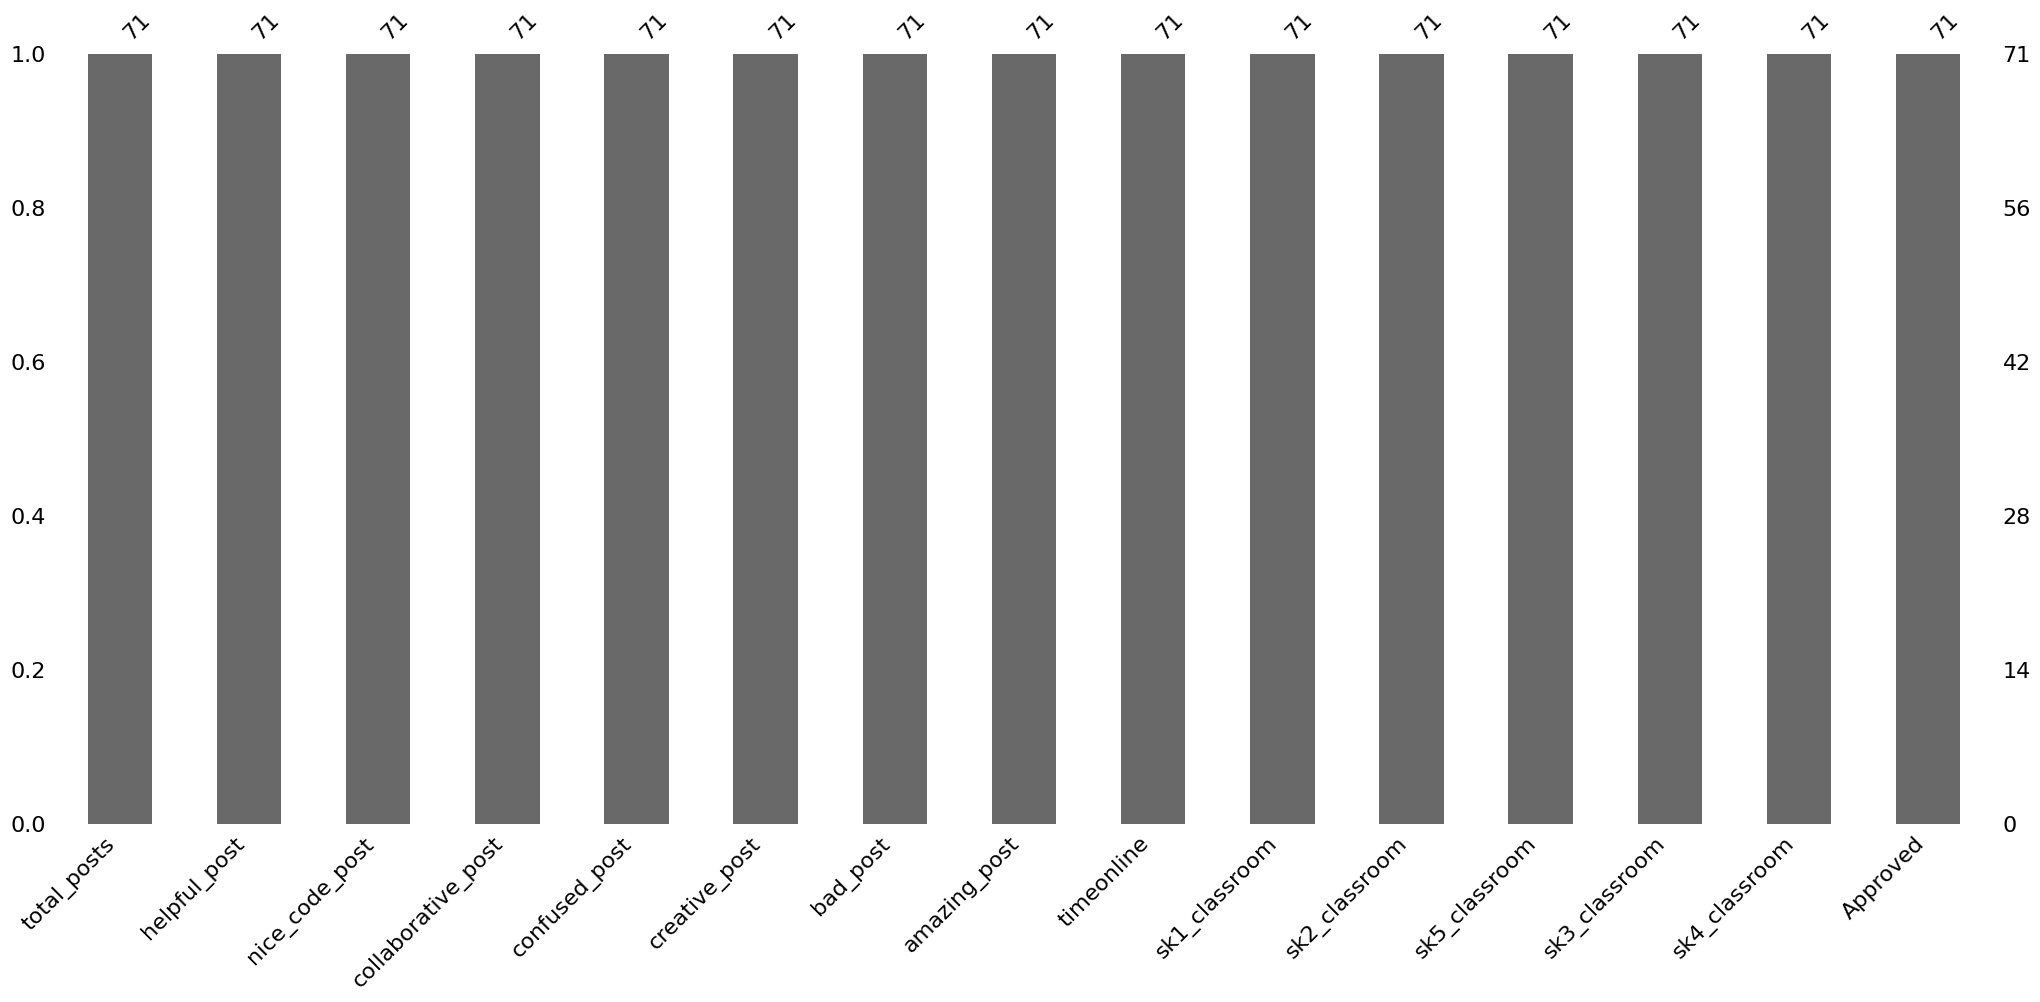

In [12]:
#another look into missing values of our dataset
missingno.bar(data)
plt.show()
#good

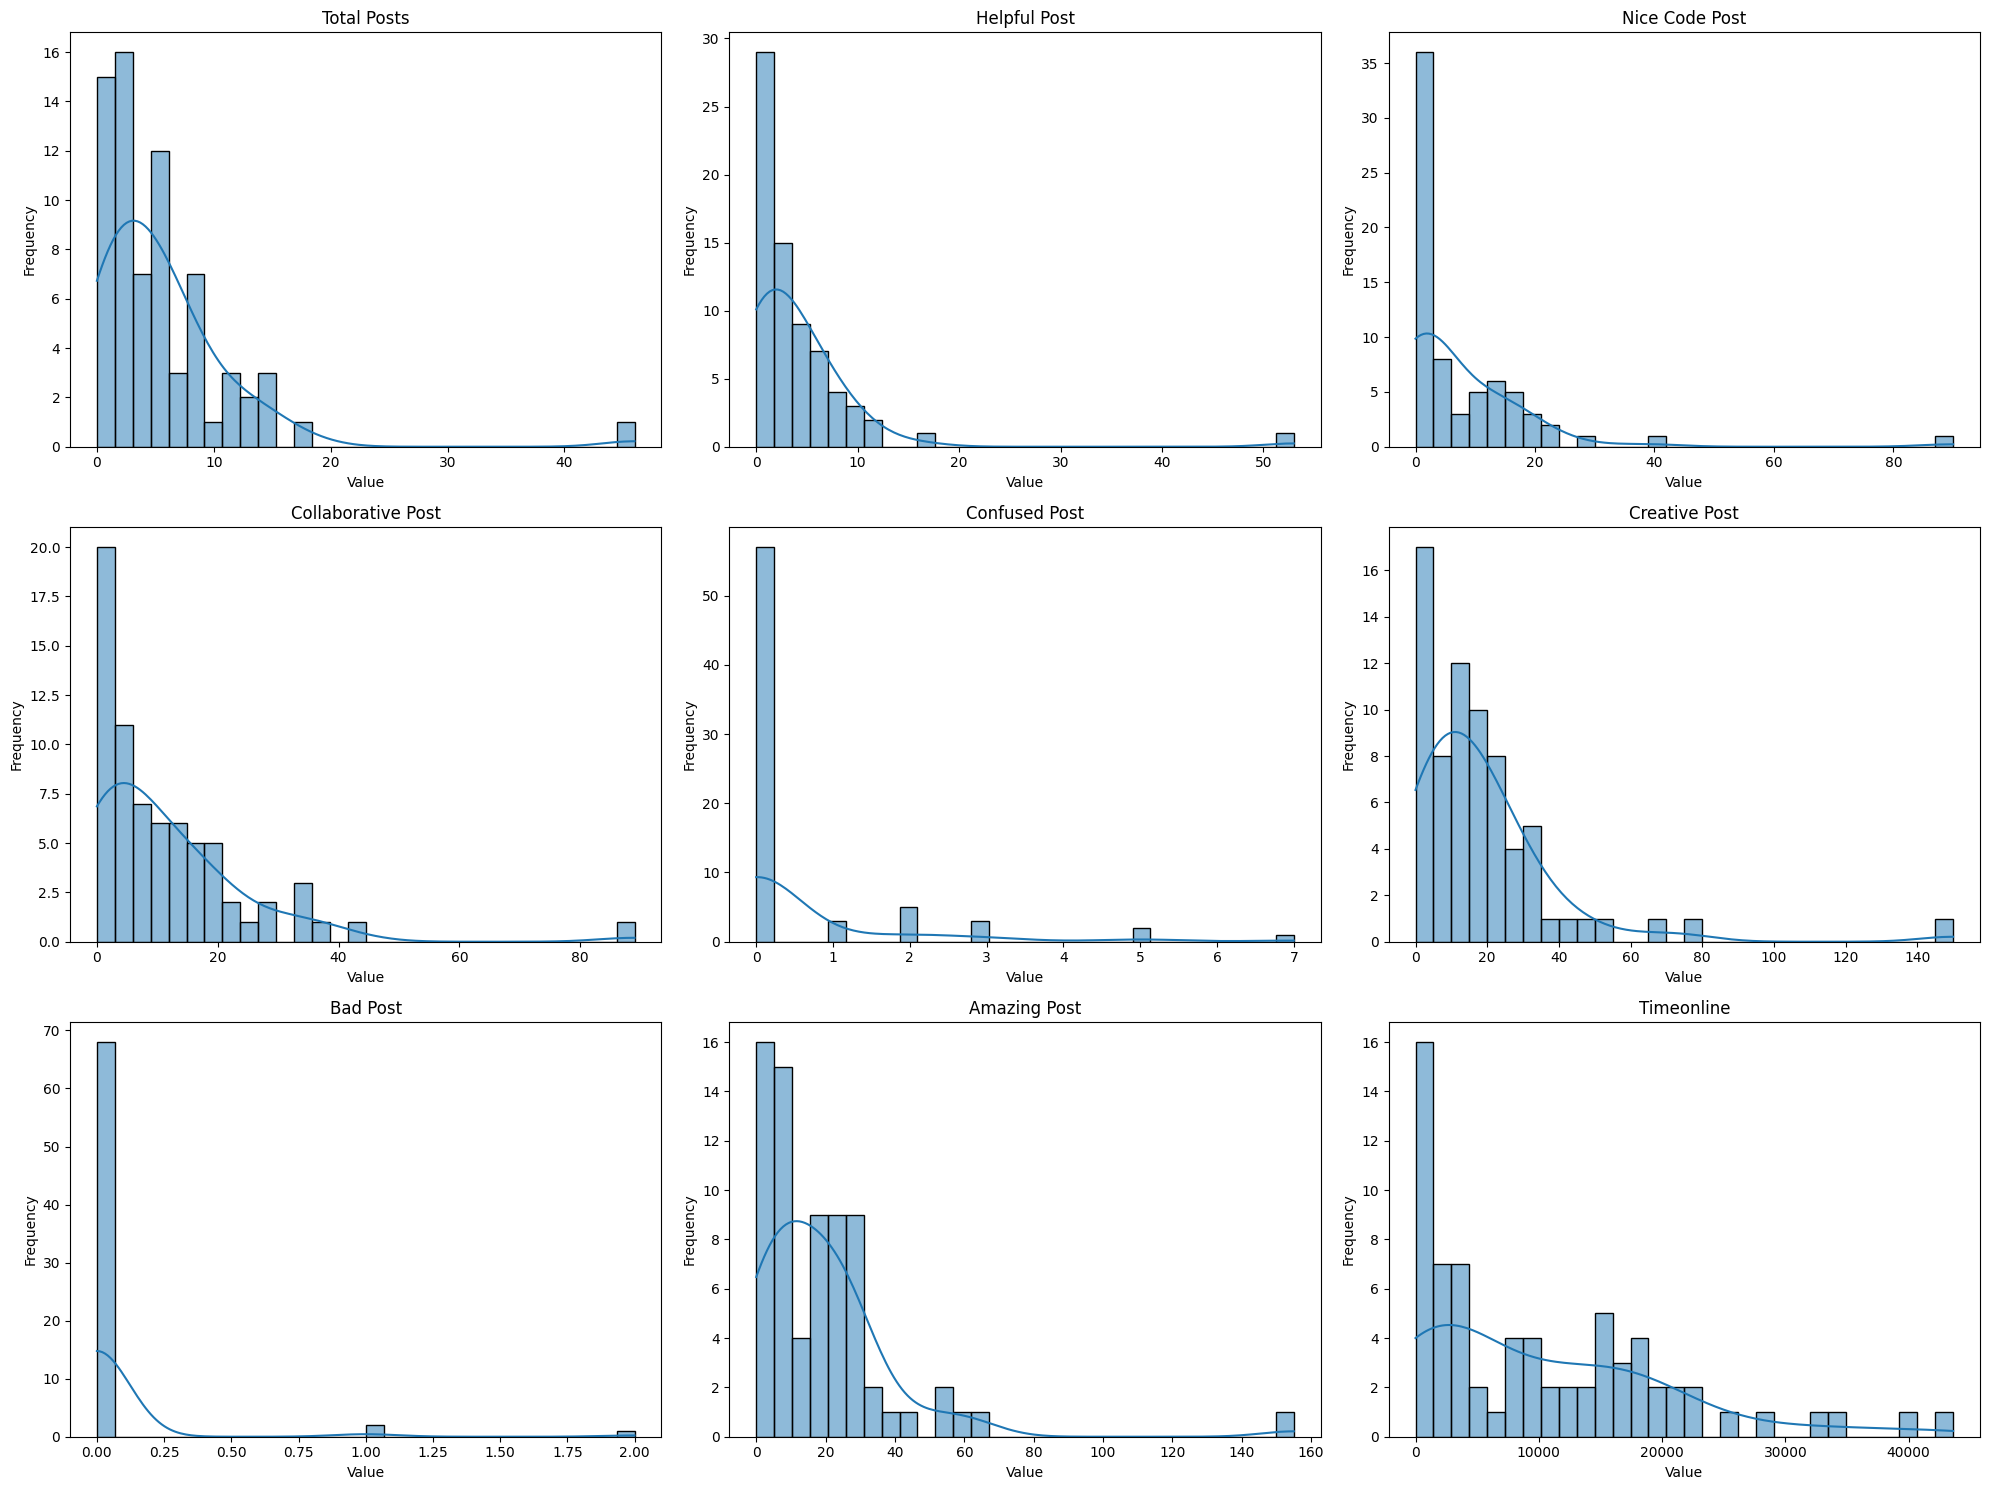

In [13]:
# Distribution plots
columns_to_plot = ['total_posts', 'helpful_post', 'nice_code_post', 'collaborative_post', 
                   'confused_post', 'creative_post', 'bad_post', 'amazing_post', 'timeonline']
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
ax = ax.flatten()
for i, column in enumerate(columns_to_plot):
    sns.histplot(data[column], bins=30, ax=ax[i], kde=True)
    ax[i].set_title(column.replace('_', ' ').title())
    ax[i].set_ylabel('Frequency')
    ax[i].set_xlabel('Value')
plt.tight_layout()


Text(0.5, 1.0, 'Correlation Matrix')

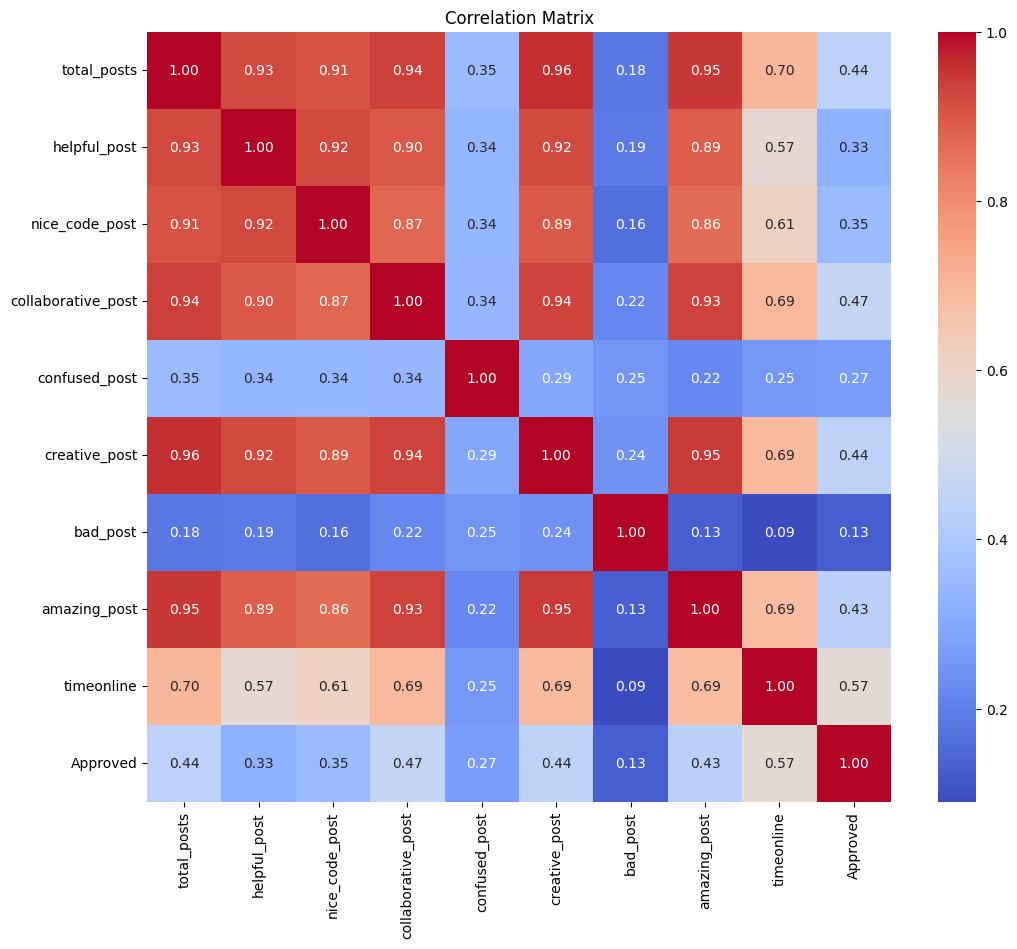

In [14]:
# Correlation matrix
correlation_matrix = data[columns_to_plot + ['Approved']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

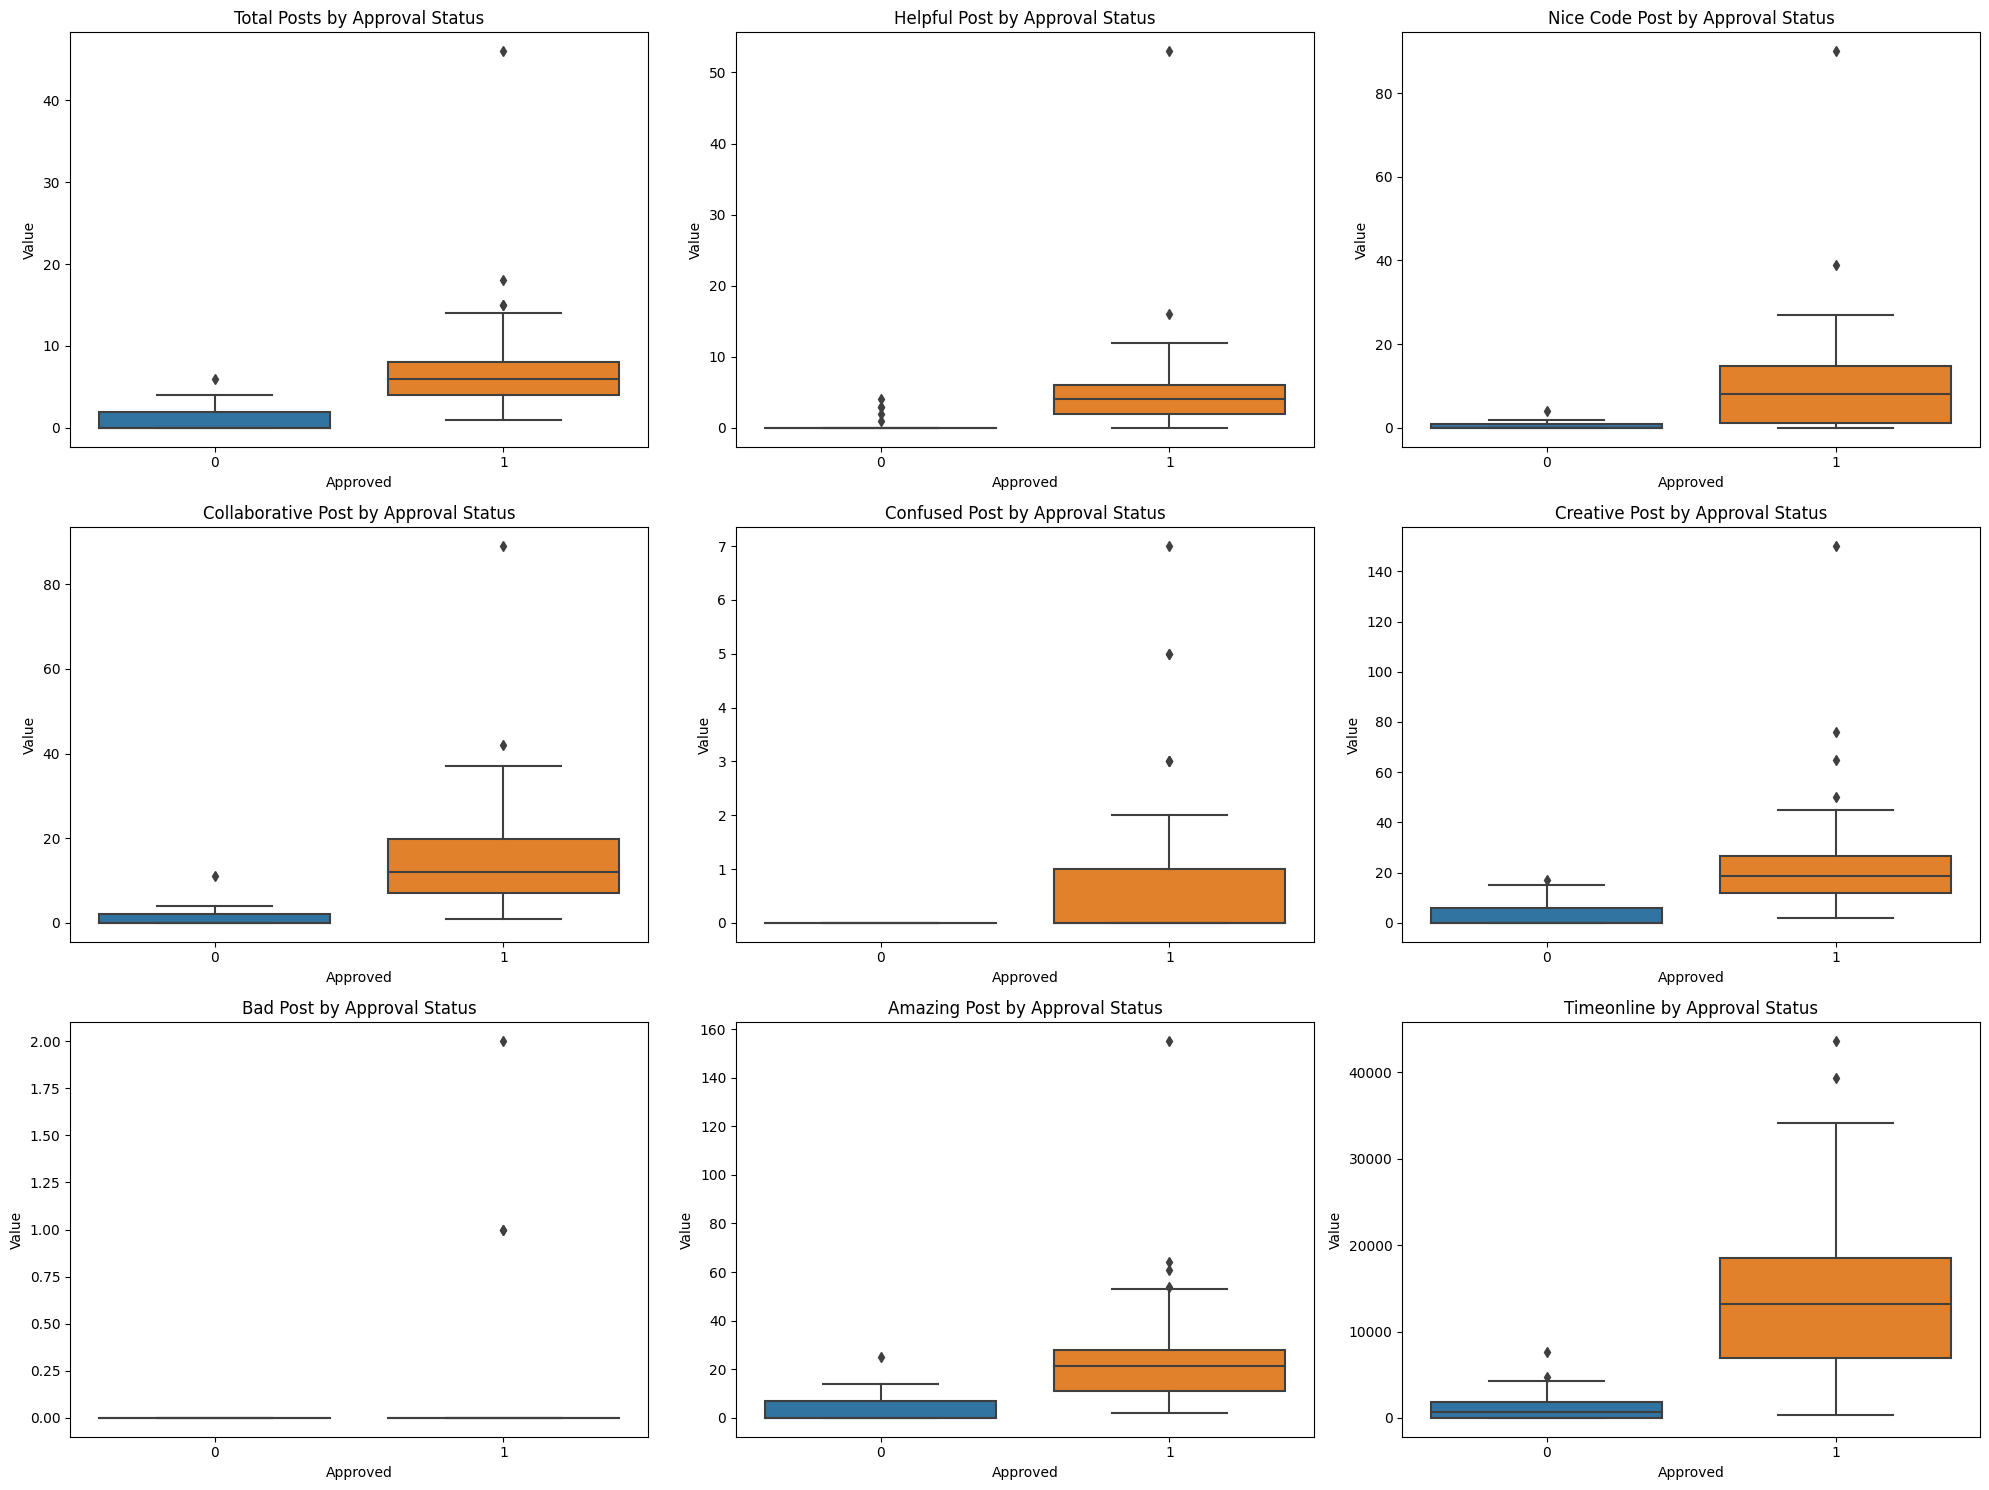

In [15]:
# Box plots for various variables split by approval status
fig, ax = plt.subplots(3, 3, figsize=(20, 15))
ax = ax.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(x='Approved', y=column, data=data, ax=ax[i])
    ax[i].set_title(f'{column.replace("_", " ").title()} by Approval Status')
    ax[i].set_ylabel('Value')
    ax[i].set_xlabel('Approved')

plt.tight_layout()
plt.show()

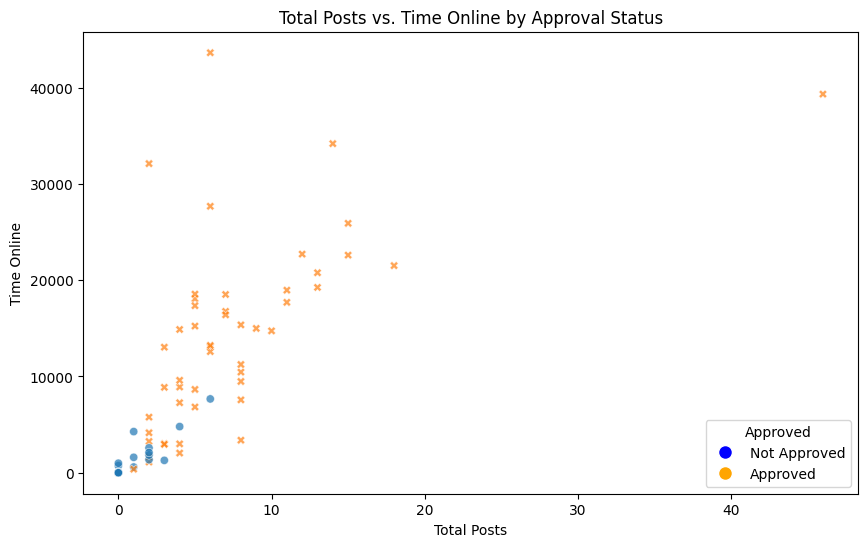

In [16]:
# Scatter plots for total_posts vs. timeonline, colored by approval status


approved_colors = {'Not Approved': 'blue', 'Approved': 'orange'}

# Scatter plots for total_posts vs. timeonline, colored by approval status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='total_posts', y='timeonline', hue='Approved', style='Approved', alpha=0.7)

# Custom legend with colors matching the plot
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Not Approved', markerfacecolor=approved_colors['Not Approved'], markersize=10),
                   plt.Line2D([0], [0], marker='o', color='w', label='Approved', markerfacecolor=approved_colors['Approved'], markersize=10)]

plt.title('Total Posts vs. Time Online by Approval Status')
plt.xlabel('Total Posts')
plt.ylabel('Time Online')
plt.legend(handles=legend_elements, title='Approved')
plt.show()



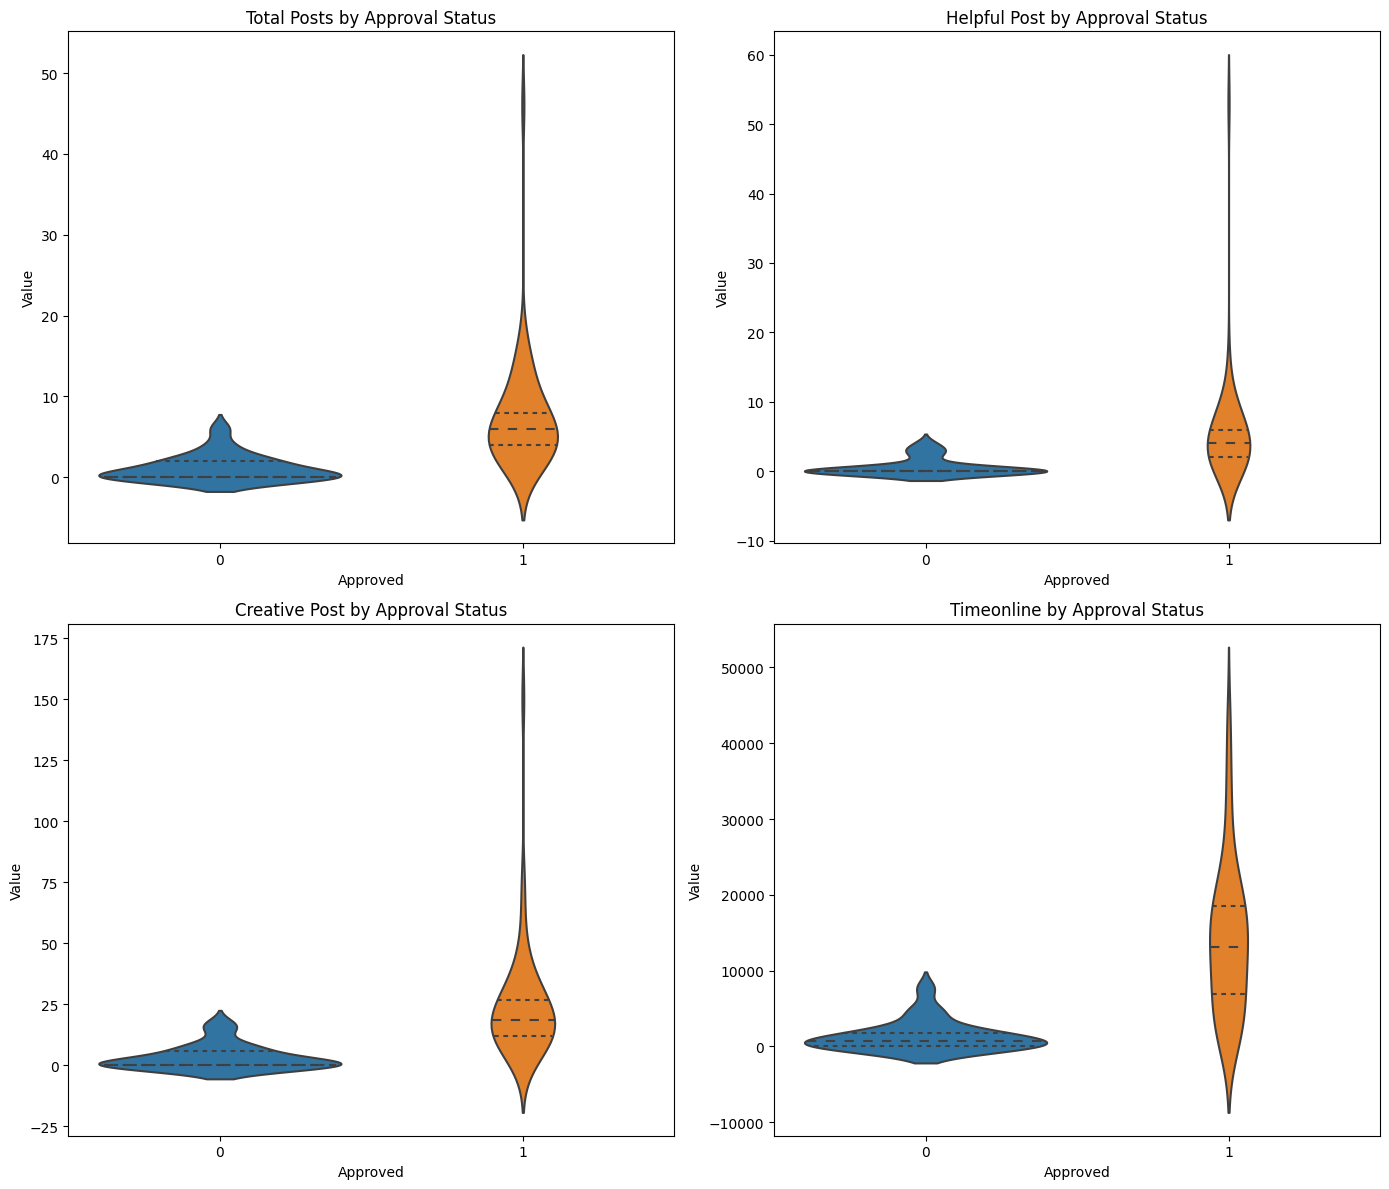

In [17]:
# Violin plots for a selection of post types by approval status
selected_columns = ['total_posts', 'helpful_post', 'creative_post', 'timeonline']

fig, ax = plt.subplots(2, 2, figsize=(14, 12))
ax = ax.flatten()

for i, column in enumerate(selected_columns):
    sns.violinplot(x='Approved', y=column, data=data, ax=ax[i], inner="quartile")
    ax[i].set_title(f'{column.replace("_", " ").title()} by Approval Status')
    ax[i].set_ylabel('Value')
    ax[i].set_xlabel('Approved')

plt.tight_layout()
plt.show()

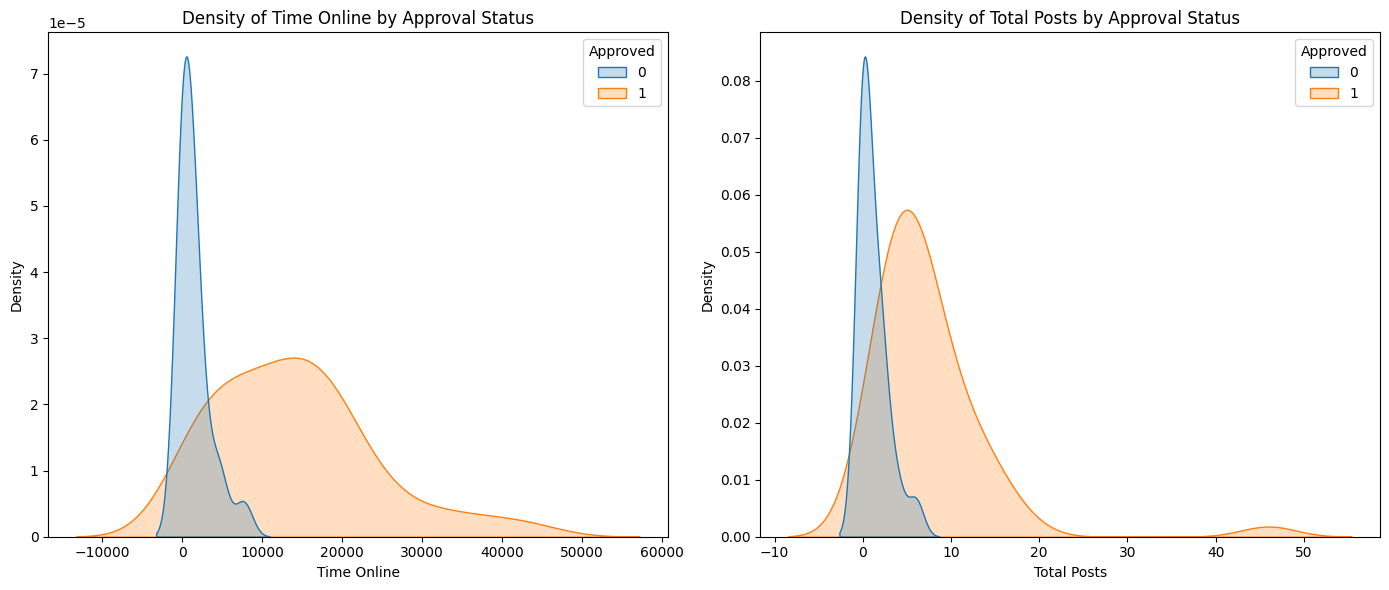

In [18]:
# KDE plots for Time Online and Total Posts by Approval Status
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Time Online
sns.kdeplot(data=data, x='timeonline', hue='Approved', ax=ax[0], fill=True)
ax[0].set_title('Density of Time Online by Approval Status')
ax[0].set_xlabel('Time Online')
ax[0].set_ylabel('Density')

# Total Posts
sns.kdeplot(data=data, x='total_posts', hue='Approved', ax=ax[1], fill=True)
ax[1].set_title('Density of Total Posts by Approval Status')
ax[1].set_xlabel('Total Posts')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

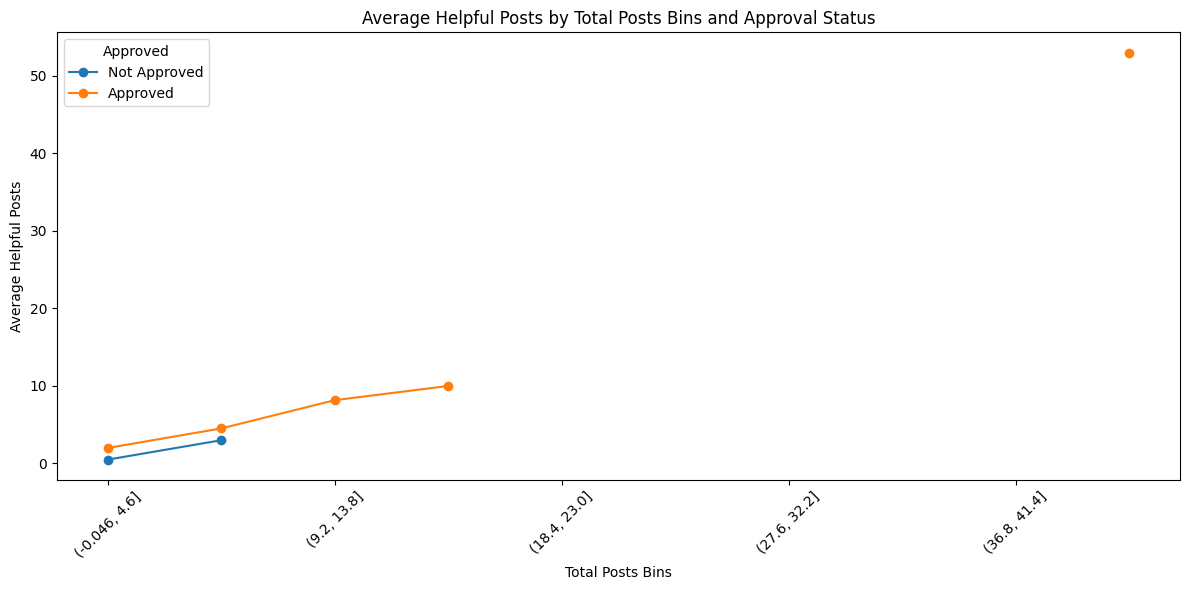

In [19]:
# Line plot for Helpful Post vs. Total Posts by Approval Status
# We'll average the helpful posts for bins of total posts to make the trend clearer

# Binning total posts to create categories
data['total_posts_bin'] = pd.cut(data['total_posts'], bins=10)

# Calculating mean helpful posts for each bin, split by approval status
mean_helpful_by_bin = data.groupby(['total_posts_bin', 'Approved'])['helpful_post'].mean().unstack()

# Plotting
mean_helpful_by_bin.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Average Helpful Posts by Total Posts Bins and Approval Status')
plt.xlabel('Total Posts Bins')
plt.ylabel('Average Helpful Posts')
plt.xticks(rotation=45)
plt.legend(title='Approved', labels=['Not Approved', 'Approved'])
plt.tight_layout()
plt.show()